In [2]:
import pandas as pd

In [8]:
netflix=pd.read_csv(r"C:\Nilakshi\Portfolio\netflix_data.csv")

In [10]:
#Looking at first 5 rows of data
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [11]:
#Number of rows and columns
netflix.shape

(7787, 11)

In [12]:
#Total number of elements in the DF
netflix.size

85657

In [13]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [14]:
#By looking at this we canidentify data types of different columns, rows with null
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [15]:
#Total number of duplicated rows
netflix.duplicated().sum()

0

This dataset has 7787 rows and it has few columns with null values. No duplicated data.

In [16]:
#Number of missing values in each column
netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

Columns director, cast and country has the highest number of missing values.

In [17]:
#Unique data types in the DF
netflix.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

In [18]:
#Dealng with NA values
#filling missing values in director, cast and country columns with unknown

netflix["director"].fillna("unknown",inplace=True)
netflix["cast"].fillna("unknown",inplace=True)
netflix["country"].fillna("unknown",inplace=True)

In [19]:
#Dropping rows with NA in dates column as there's only 10 rows
netflix.dropna(subset=["date_added"],inplace=True)

In [20]:
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [22]:
#Convert date_added column to a date field
netflix["date_added"]=pd.to_datetime(netflix["date_added"],errors="coerce")

We have dealt with null values and data is ready for analysis. 
Before that let's look at any outliers in the data set.

In [23]:
print(netflix.describe())

       release_year     duration
count   7777.000000  7777.000000
mean    2013.935965    69.204706
std        8.760694    50.931983
min     1925.000000     1.000000
25%     2013.000000     2.000000
50%     2017.000000    88.000000
75%     2018.000000   106.000000
max     2021.000000   312.000000


# Handling outliers

<AxesSubplot:xlabel='release_year'>

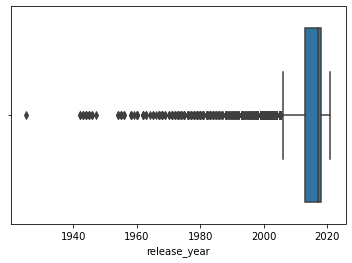

In [25]:
##Import packages

import seaborn as sns

sns.boxplot(x="release_year",data=netflix)

According to the graph, release year column has few outliers. I decided the outliers to be outside of minimum value.

In [29]:
import numpy as np

qh25,qh75=np.percentile(netflix["release_year"],[25,75])

iqr=qh75-qh25
minh=qh25-1.5*iqr

#choose data inside IQR

netflix=netflix[(netflix["release_year"]>minh)]

In [30]:
print("new shape",netflix.shape)

new shape (6603, 11)


<AxesSubplot:xlabel='release_year'>

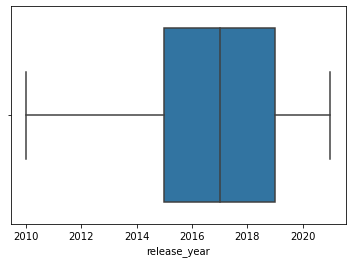

In [31]:
#Check whether the outliers are removed

sns.boxplot(x="release_year",data=netflix)

Now the dataset is ready for analysis.

In [32]:
netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
duration                 int64
description             object
genre                   object
dtype: object

# Analysis of data

# Content added across all years

In [34]:
release_year_counts=netflix["release_year"].value_counts().sort_index()
release_year_counts


2010     172
2011     166
2012     218
2013     266
2014     334
2015     539
2016     881
2017    1012
2018    1120
2019     996
2020     868
2021      31
Name: release_year, dtype: int64

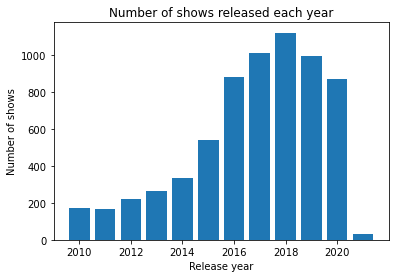

In [38]:
#Total Content added across all years
import matplotlib.pyplot as plt
plt.bar(x=release_year_counts.index,height=release_year_counts.values)
plt.title("Number of shows released each year")
plt.xlabel("Release year")
plt.ylabel("Number of shows")
plt.show()

By looking at this graph we can conclude that the highest number of content was
released in 2018.


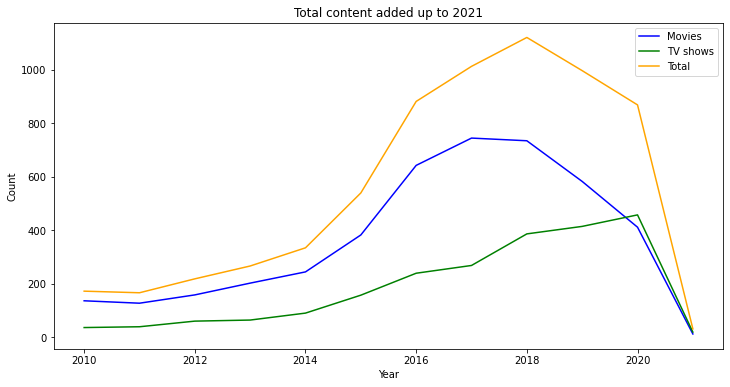

In [36]:
#Amount of Movies and TV shows added throughout the data collection period
#Filter for movies and TV shows

movies_df=netflix[netflix["type"]=="Movie"]
tv_shows_df=netflix[netflix["type"]=="TV Show"]

#count of number of movies added each year

movies_count= movies_df["release_year"].value_counts().sort_index()

#count of number of tv shows added each year

tv_shows_count= tv_shows_df["release_year"].value_counts().sort_index()

#Plot movies count
plt.figure(figsize=(12,6))
plt.plot(movies_count.index,movies_count.values,label="Movies",color="blue")

#plot tv show count
plt.plot(tv_shows_count.index,tv_shows_count.values, label="TV shows",color="green")

#plot of total content
plt.plot(release_year_counts.index, release_year_counts.values, label="Total", color="orange")
plt.title("Total content added up to 2021")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show() 

Since 2015 the amount of content added has increased significantly. The growth in
movies is much bigger than on TV shows.

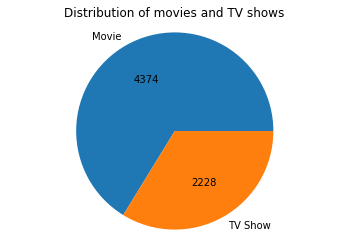

In [40]:
#Distrubiution of movies and TV shows
type_count= netflix["type"].value_counts()

#creating autocpt arguments to display count
def countval (i):
 a= int(i/100 *sum(type_count))
 return "{:d}".format(a)

plt.pie(x=type_count.values,labels=type_count.index,autopct=countval)
plt.title("Distribution of movies and TV shows")
plt.axis("equal")
plt.show()


There's more than 4000 movies and 2200 TV Shows, movies being the majority.


In [41]:
#Which countries produces the most number of content

#count of content producted by each country
content_count=netflix["country"].value_counts().head(20) #Gives the top 20 item
content_count


United States     2342
India              714
United Kingdom     506
unknown            477
Canada             244
Japan              198
South Korea        189
France             178
Spain              166
Mexico             114
Turkey              96
Australia           96
China               83
Brazil              78
Germany             77
Egypt               74
Nigeria             70
Philippines         69
Taiwan              67
Indonesia           67
Name: country, dtype: int64

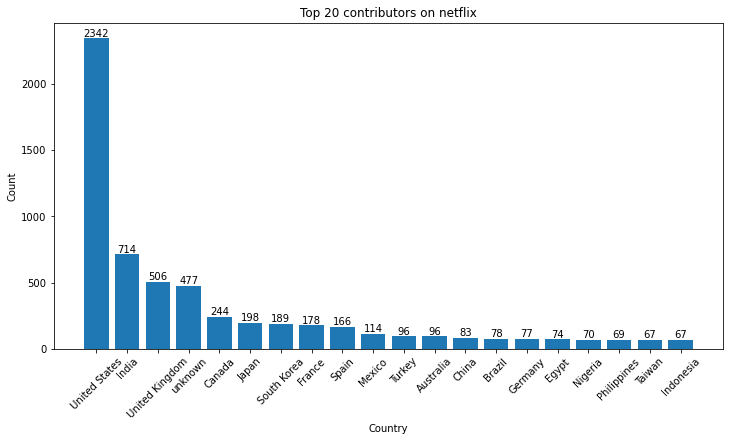

In [42]:
plt.figure(figsize=(12,6))

bars=plt.bar(x=content_count.index, height=content_count.values)
plt.xticks(rotation=45) #rotating the x axis labels
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 20 contributors on netflix")

plt.bar_label(bars) #showing the bar labels

plt.show()

United States got the highest number of content followed by India and UK.

In [43]:
netflix.head()


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,1,A genetics professor experiments with a treatm...,International TV
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [44]:
#Let's look at top genres on netflix
genre_count=netflix["genre"].value_counts().head(15)
genre_count

Dramas                  1158
Comedies                 838
Documentaries            719
International TV         651
Action                   489
Children                 407
Crime TV                 362
Stand-Up                 325
Kids                     324
Horror Movies            212
British TV               212
Docuseries               184
Anime Series             123
TV Comedies              100
International Movies     100
Name: genre, dtype: int64

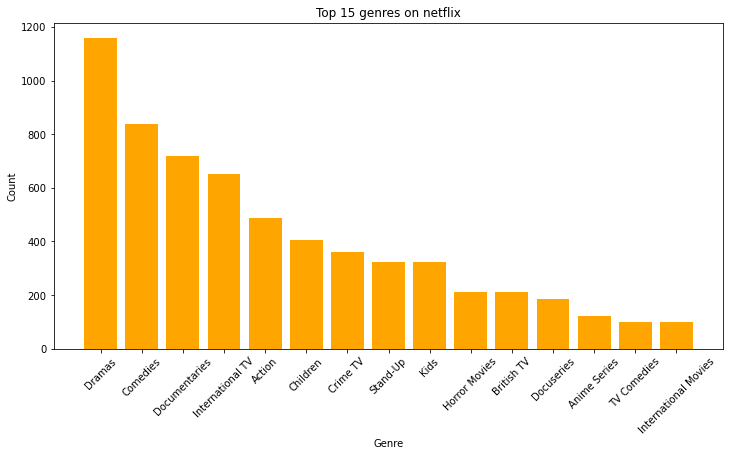

In [45]:
#Top 15 genres on netflix
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Top 15 genres on netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.bar(x=genre_count.index, height=genre_count.values,color="orange")
plt.show()


So the most popular genre is Dramas followed by comedies and documentries.


In [47]:
# Analysis of top actors
#split the actors in each row
actor_counts=netflix["cast"].str.split(",", expand=True).stack().value_counts()
actor_counts


unknown              688
 Takahiro Sakurai     27
 Andrea Libman        24
 Yuki Kaji            23
 Vincent Tong         22
                    ... 
 Nadim Abou Samra      1
 Laeticia Semaan       1
 Jenny Gebara          1
 Samira Sarkis         1
 Rachel Khoo           1
Length: 30777, dtype: int64

In [48]:
#Top 15 actors
Top_actors=actor_counts.head(15)
Top_actors 

unknown                688
 Takahiro Sakurai       27
 Andrea Libman          24
 Yuki Kaji              23
 Vincent Tong           22
 Ai Kayano              18
 Anupam Kher            18
 Kana Hanazawa          17
 Junichi Suwabe         17
 Tomokazu Sugita        16
 Erin Fitzgerald        16
 Daisuke Ono            16
 Ashleigh Ball          16
 Alessandro Juliani     15
 Pankaj Tripathi        15
dtype: int64

In [49]:
#removing unknowns from the data set
Top=Top_actors.drop(["unknown"])
Top


 Takahiro Sakurai      27
 Andrea Libman         24
 Yuki Kaji             23
 Vincent Tong          22
 Ai Kayano             18
 Anupam Kher           18
 Kana Hanazawa         17
 Junichi Suwabe        17
 Tomokazu Sugita       16
 Erin Fitzgerald       16
 Daisuke Ono           16
 Ashleigh Ball         16
 Alessandro Juliani    15
 Pankaj Tripathi       15
dtype: int64

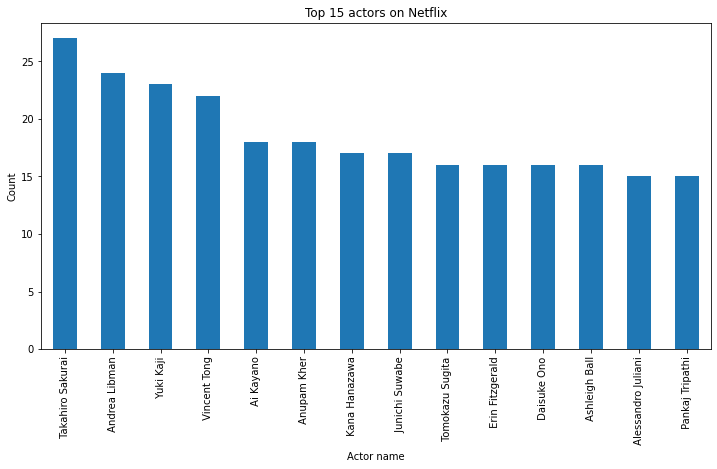

In [50]:
plt.figure(figsize=(12,6))
Top.plot(kind="bar")
plt.title("Top 15 actors on Netflix")
plt.xlabel("Actor name")
plt.ylabel("Count")
plt.show()


Based on the number of titles, top actor on netflix is Anupham Kher.


In [52]:
#Distribution of movie durations

#Filtering only movies
movies=netflix[netflix["type"]=="Movie"]
movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4374 entries, 1 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4374 non-null   object        
 1   type          4374 non-null   object        
 2   title         4374 non-null   object        
 3   director      4374 non-null   object        
 4   cast          4374 non-null   object        
 5   country       4374 non-null   object        
 6   date_added    4374 non-null   datetime64[ns]
 7   release_year  4374 non-null   int64         
 8   duration      4374 non-null   int64         
 9   description   4374 non-null   object        
 10  genre         4374 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 410.1+ KB


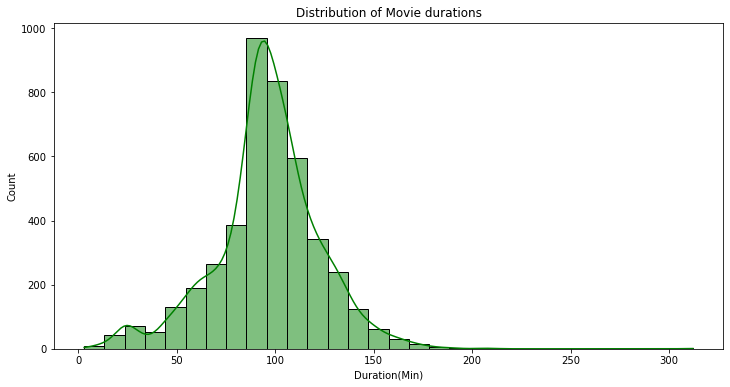

In [53]:
#Distribution of movie durations
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(movies["duration"],bins=30, kde=True, color="green")
plt.title("Distribution of Movie durations")
plt.xlabel("Duration(Min)")
plt.ylabel("Count")
plt.show()

Among the analysed movies, 90 minutes is the most frequent duration followed by 100
min

# Insights and summary


**Content Distribution & Type Trend Over Time:** A significant increase in content releases
from 2015, peaking in 2018, followed by a slower growth rate. Content Library: Netflix’s
library predominantly consists of movies (approximately 4300) compared to TV shows
(around 2200), with a higher growth rate for movies since 2015.


**Geographical Insights Content Production:** The United States is the leading producer of
content, with India and the United Kingdom following.

**Popular Genres Top Genres:** The most common genres are Dramas, Comedies, and
Documentaries.

**Featured Actors Most Featured Actor:** Anupam Kher holds the record for the most titles,
with Takahiro Sakurai as the runner-up.

**Average Duration Movie Duration:** The average duration for movies on Netflix is 100
minutes.

# Additional Conclusions:


The peak in 2018 suggests a strategic push by Netflix to expand its content offerings,
possibly in response to increasing competition in the streaming market.

The larger number of movies might indicate a focus on providing a wide variety of
single-viewing experiences, which could align with user preferences for shorter, more
diverse content consumption.

The dominance of the US in content production reflects the global influence of American
media, while the significant contribution from India highlights the popularity and growth
of Bollywood content on international platforms.

The prevalence of Dramas and Comedies suggests these genres have universal appeal,
potentially driving higher viewership and subscriber retention.

The prominence of actors like Anupam Kher and Takahiro Sakurai indicates a diverse
range of content catering to both Indian and Japanese audiences, which aligns with
Netflix’s strategy of localization and global reach.

The average movie duration of 100 minutes aligns with the traditional film industry
standard, indicating Netflix’s alignment with viewer expectations for movie length.